In [44]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [45]:
gpus = tf.config.experimental.list_physical_devices('GPU')  
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

In [46]:
#MNIST number dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#normalize the data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)


In [47]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ]
)

/opt/miniconda3/envs/tf_py3.9/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [48]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
model.fit(x_train, tf.keras.utils.to_categorical(y_train), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8198 - loss: 0.6000
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9457 - loss: 0.1826
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9609 - loss: 0.1298
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9677 - loss: 0.1025
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9720 - loss: 0.0901
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9747 - loss: 0.0793
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9772 - loss: 0.0704
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9802 - loss: 0.0642
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9807 - loss: 0.0602
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9826 - loss: 0.0527


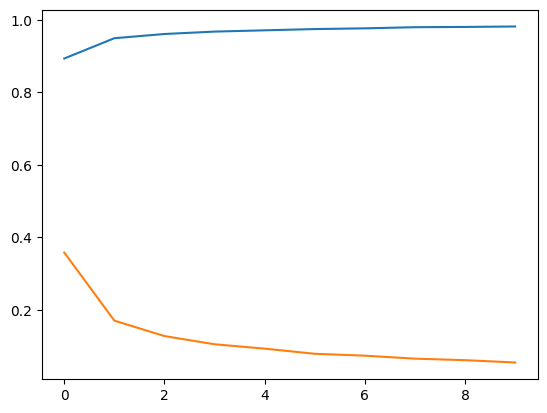

In [50]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['loss'])
plt.show()

In [52]:
model.save('mnist_model.h5')

In [7]:
model.load_weights('mnist_model.h5')

In [53]:
model.evaluate(x_test, tf.keras.utils.to_categorical(y_test))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9714 - loss: 0.0983


[0.08770355582237244, 0.9753000140190125]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[1.2326693e-09 6.0505187e-08 7.3667647e-06 6.4324173e-05 9.5569952e-10
 3.3224435e-08 4.1366039e-17 9.9992752e-01 5.1272155e-09 5.7417384e-07]
7


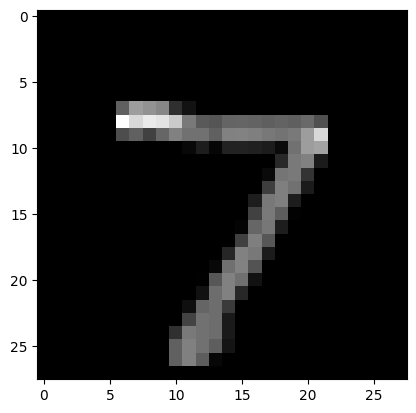

In [9]:
#predict the first 10 numbers
predictions = model.predict(x_test[0:1])

print(predictions[0])
print(np.argmax(predictions[0]))
plt.imshow(x_test[0], cmap='gray')
plt.show()


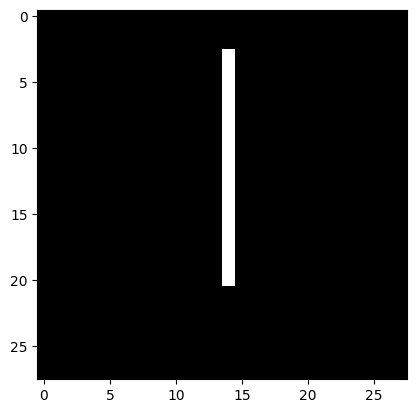

In [24]:
userimg = 'wasd.png'
img = tf.keras.preprocessing.image.load_img(userimg, target_size=(28, 28), color_mode='grayscale')

#flip the alpha channel
img = np.array(img)
img = 255 - img
img = img / 255.0

plt.imshow(img, cmap='gray')

In [27]:
print(np.argmax(model.predict(np.array([img]))[0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1


In [43]:
test_data = pd.read_csv('test.csv')
test_data = test_data.to_numpy()

test_data = test_data.reshape(-1, 28, 28)
#predict the test data and save it to a csv file
predictions = model.predict(test_data)
predictions = np.argmax(predictions, axis=1)

df = pd.DataFrame(predictions, columns=['Label'])
df.index += 1
df.index.name = 'ImageId'
df.to_csv('submission.csv')


875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 807us/step
